In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [14]:

file_path = 'C:\\Users\\User\\Desktop\\MASTERE SPECIALISE IA\\periode 2\\Seminaires BGDIA705\\wetransfer_message-pour-la-promotion_2024-12-12_2049\\DPE-Zip\\dpe-v2-logements-existants-random.csv\\dpe-v2-logements-existants-random.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


C:\Users\User\AppData\Local\Temp\ipykernel_19796\1041134129.py:2: DtypeWarning: Columns (11,29,30,218,219,220,221,222,226) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


,N°DPE,Date_réception_DPE,Date_établissement_DPE,Date_visite_diagnostiqueur,Modèle_DPE,N°_DPE_remplacé,Date_fin_validité_DPE,Version_DPE,N°_DPE_immeuble_associé,Appartement_non_visité_(0/1),...,Type_générateur_froid,Surface_climatisée,Type_énergie_climatisation,Catégorie_ENR,Electricité_PV_autoconsommée,Système_production_électricité_origine_renouvelable,Présence_production_PV_(0/1),Production_électricité_PV_(kWhep/an),Surface_totale_capteurs_photovoltaïque,Nombre_module
0,2367E0834111W,2023-03-14,2023-03-13,2023-03-13,DPE 3CL 2021 méthode logement,NaN,2033-03-12,2.2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Solaire Photovoltaïque,1.0,0.0,NaN,2.0
1,2335E2194416B,2023-06-29,2023-06-28,2023-06-28,DPE 3CL 2021 méthode logement,NaN,2033-06-27,2.3,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,Solaire Photovoltaïque,0.0,0.0,NaN,NaN
2,2465E3436371T,2024-10-01,2024-09-30,2024-09-30,DPE 3CL 2021 méthode logement,NaN,2034-09-29,2.4,NaN,NaN,...,NaN,NaN,NaN,Il existe plusieurs descriptifs ENR,NaN,Solaire Photovoltaïque,1.0,4728.7,9.6,8.0
3,2344E0822003H,2023-03-13,2023-03-12,2023-03-12,DPE 3CL 2021 méthode logement,NaN,2033-03-11,2.2,NaN,NaN,...,NaN,NaN,NaN,Il existe plusieurs descriptifs ENR,NaN,Solaire Photovoltaïque,1.0,6186.9,20.0,NaN
4,2330E0798770E,2023-03-10,2023-03-09,2023-03-09,DPE 3CL 2021 méthode logement,NaN,2033-03-08,2.2,NaN,NaN,...,PAC air/eau installée après 2017,182.6,Électricité,Il existe plusieurs descriptifs ENR,NaN,Solaire Photovoltaïque,1.0,6029.1,16.0,10.0


In [15]:
# Check for missing values in each column
missing_values = data.isnull().sum()
missing_values


N°DPE                                                      0
Date_réception_DPE                                         0
Date_établissement_DPE                                     0
Date_visite_diagnostiqueur                                 0
Modèle_DPE                                                 0
                                                       ...  
Système_production_électricité_origine_renouvelable    67916
Présence_production_PV_(0/1)                           67483
Production_électricité_PV_(kWhep/an)                       0
Surface_totale_capteurs_photovoltaïque                 88569
Nombre_module                                          89801
Length: 242, dtype: int64

In [16]:
# Descriptive statistics to help identify anomalies
data.describe()


,Version_DPE,N°_DPE_immeuble_associé,Appartement_non_visité_(0/1),N°_RPLS_logement,Année_construction,Type_installation_chauffage,Type_installation_ECS_(général),Hauteur_sous-plafond,Nombre_appartement,Nombre_niveau_immeuble,...,Surface_ventilée,Ventilation_postérieure_2012_(0/1),Conso_refroidissement_annuel,Conso_refroidissement_dépensier_annuel,Surface_climatisée,Electricité_PV_autoconsommée,Présence_production_PV_(0/1),Production_électricité_PV_(kWhep/an),Surface_totale_capteurs_photovoltaïque,Nombre_module
count,93605.000000,0.0,10909.0,1.710000e+02,93605.000000,0.0,0.0,93605.000000,11429.000000,11496.000000,...,18515.000000,18529.000000,13203.000000,13203.000000,13658.000000,11290.000000,26122.000000,93605.000000,5036.000000,3804.000000
mean,2.012547,NaN,0.0,3.776894e+07,2009.171198,NaN,NaN,2.539150,1.124595,1.599078,...,98.311893,0.351341,309.166030,1037.607703,94.432501,21.369699,0.491348,278.265396,12.183280,8.840431
std,0.483462,NaN,0.0,1.598325e+07,5.978010,NaN,NaN,2.343493,3.056615,0.568351,...,43.361502,0.477402,423.243463,1703.253933,60.434335,182.123336,0.499935,2502.109326,30.995932,17.062599
min,1.000000,NaN,0.0,1.349935e+07,2000.000000,NaN,NaN,0.400000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.100000,NaN,0.0,2.064064e+07,2005.000000,NaN,NaN,2.500000,1.000000,1.000000,...,74.400000,0.000000,77.800000,220.550000,52.000000,0.000000,0.000000,0.000000,2.400000,1.000000
50%,2.200000,NaN,0.0,4.744580e+07,2008.000000,NaN,NaN,2.500000,1.000000,2.000000,...,88.100000,0.000000,164.300000,451.400000,87.200000,1.000000,0.000000,0.000000,9.600000,8.000000
75%,2.300000,NaN,0.0,5.257524e+07,2013.000000,NaN,NaN,2.500000,1.000000,2.000000,...,112.000000,1.000000,346.250000,972.950000,120.000000,1.000000,1.000000,0.000000,16.800000,12.000000
max,2.400000,NaN,0.0,5.847550e+07,2027.000000,NaN,NaN,249.000000,131.000000,10.000000,...,1120.000000,1.000000,7555.200000,30995.500000,1500.000000,3858.400000,1.000000,503099.600000,1849.000000,600.000000


In [17]:
# Display column names to identify relevant features
data.columns


Index(['N°DPE', 'Date_réception_DPE', 'Date_établissement_DPE',
       'Date_visite_diagnostiqueur', 'Modèle_DPE', 'N°_DPE_remplacé',
       'Date_fin_validité_DPE', 'Version_DPE', 'N°_DPE_immeuble_associé',
       'Appartement_non_visité_(0/1)',
       ...
       'Type_générateur_froid', 'Surface_climatisée',
       'Type_énergie_climatisation', 'Catégorie_ENR',
       'Electricité_PV_autoconsommée',
       'Système_production_électricité_origine_renouvelable',
       'Présence_production_PV_(0/1)', 'Production_électricité_PV_(kWhep/an)',
       'Surface_totale_capteurs_photovoltaïque', 'Nombre_module'],
      dtype='object', length=242)

In [24]:
##Ensure the target variable is in a suitable format for regression analysis.
data['Electricité_PV_autoconsommée'] = pd.to_numeric(data['Electricité_PV_autoconsommée'], errors='coerce')


In [26]:
# Drop rows where the target variable is missing since we cannot use these for prediction
data.dropna(subset=['Electricité_PV_autoconsommée'], inplace=True)

# For numeric columns, fill missing values with the median
for col in data.select_dtypes(include=np.number).columns:
    data.loc[:, col] = data[col].fillna(data[col].median())

# For categorical data, fill missing values with the mode (most frequent value)
for col in data.select_dtypes(include=['object']).columns:
    if not data[col].mode().empty:  # Ensure there is at least one mode value
        data[col] = data[col].fillna(data[col].mode()[0])


c:\Users\User\Desktop\TRIAL\trial\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\User\Desktop\TRIAL\trial\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\User\Desktop\TRIAL\trial\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\User\Desktop\TRIAL\trial\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\User\Desktop\TRIAL\trial\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\User\Desktop\TRIAL\trial\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1

In [27]:
data.to_csv('cleaned_data.csv', index=False)

# Output to check the first few rows of the cleaned data
print(data.head())

            N°DPE Date_réception_DPE Date_établissement_DPE  \
15  2164E0541277V         2021-10-20             2021-10-20   
25  2181E0564692B         2021-10-25             2021-10-25   
38  2127E0539464R         2021-10-20             2021-10-20   
61  2144E0699249X         2021-11-16             2021-11-16   
86  2144E0718185F         2021-11-18             2021-11-18   

   Date_visite_diagnostiqueur                     Modèle_DPE N°_DPE_remplacé  \
15                 2021-10-18  DPE 3CL 2021 méthode logement   2101E0260184D   
25                 2021-10-25  DPE 3CL 2021 méthode logement   2101E0260184D   
38                 2021-10-20  DPE 3CL 2021 méthode logement   2101E0260184D   
61                 2021-11-16  DPE 3CL 2021 méthode logement   2101E0260184D   
86                 2021-11-16  DPE 3CL 2021 méthode logement   2101E0260184D   

   Date_fin_validité_DPE  Version_DPE  N°_DPE_immeuble_associé  \
15            2031-10-19          1.1                      NaN   
25      

In [33]:
# Load cleaned data
data = pd.read_csv('cleaned_data.csv')

# Categorical columns to be checked
categorical_cols = [
    'Type_bâtiment', 'Type_installation_chauffage', 'Classe_inertie_bâtiment',
    'Zone_climatique_', 'Nombre_niveau_logement', 'Etiquette_DPE', 'Etiquette_GES'
]
##'Etiquette_DPE', 'Etiquette_GES' : Energy performance and greenhouse gas emission labels might directly relate to energy efficiency.

# Print the number of unique values and null values for each categorical column
for col in categorical_cols:
    print(f"{col}:")
    print("Unique values count:", data[col].nunique())
    print("Null values count:", data[col].isnull().sum())
    print("Value counts:")
    print(data[col].value_counts())
    print("\n")



Type_bâtiment:
Unique values count: 1
Null values count: 0
Value counts:
Type_bâtiment
maison    11290
Name: count, dtype: int64


Type_installation_chauffage:
Unique values count: 0
Null values count: 11290
Value counts:
Series([], Name: count, dtype: int64)


Classe_inertie_bâtiment:
Unique values count: 4
Null values count: 0
Value counts:
Classe_inertie_bâtiment
Légère         6472
Moyenne        3963
Lourde          739
Très lourde     116
Name: count, dtype: int64


Zone_climatique_:
Unique values count: 8
Null values count: 0
Value counts:
Zone_climatique_
H1a    2324
H2c    1775
H2b    1759
H3     1657
H1c    1574
H2a    1065
H1b     762
H2d     374
Name: count, dtype: int64


Nombre_niveau_logement:
Unique values count: 9
Null values count: 0
Value counts:
Nombre_niveau_logement
1.0      7237
2.0      3738
3.0       281
4.0        20
5.0         9
10.0        2
7.0         1
250.0       1
6.0         1
Name: count, dtype: int64


Etiquette_DPE:
Unique values count: 7
Null valu

## Type_installation_chauffage:
Unique values count: 0

Null values count: 11290

Value counts:

Series([], Name: count, dtype: int64)

 problematic!

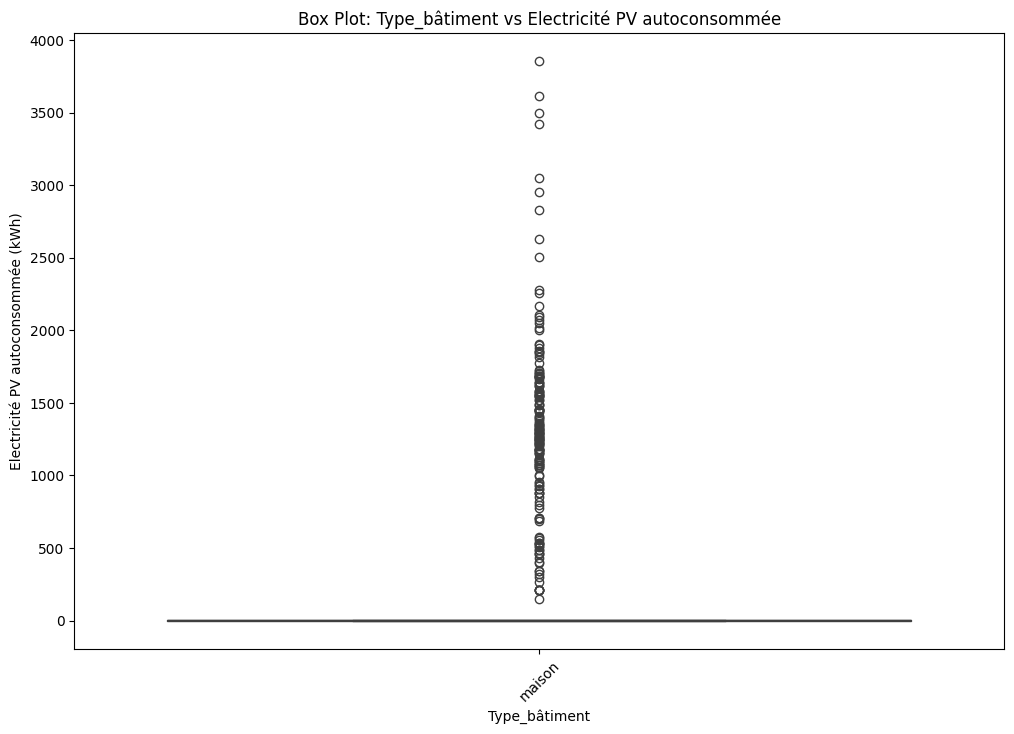

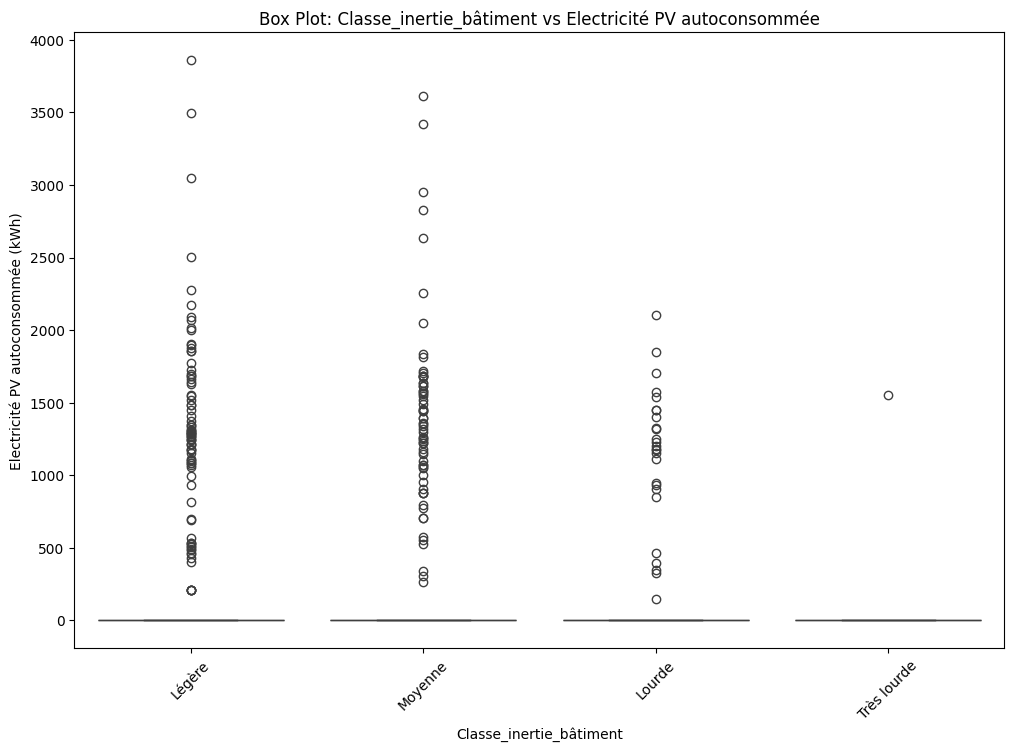

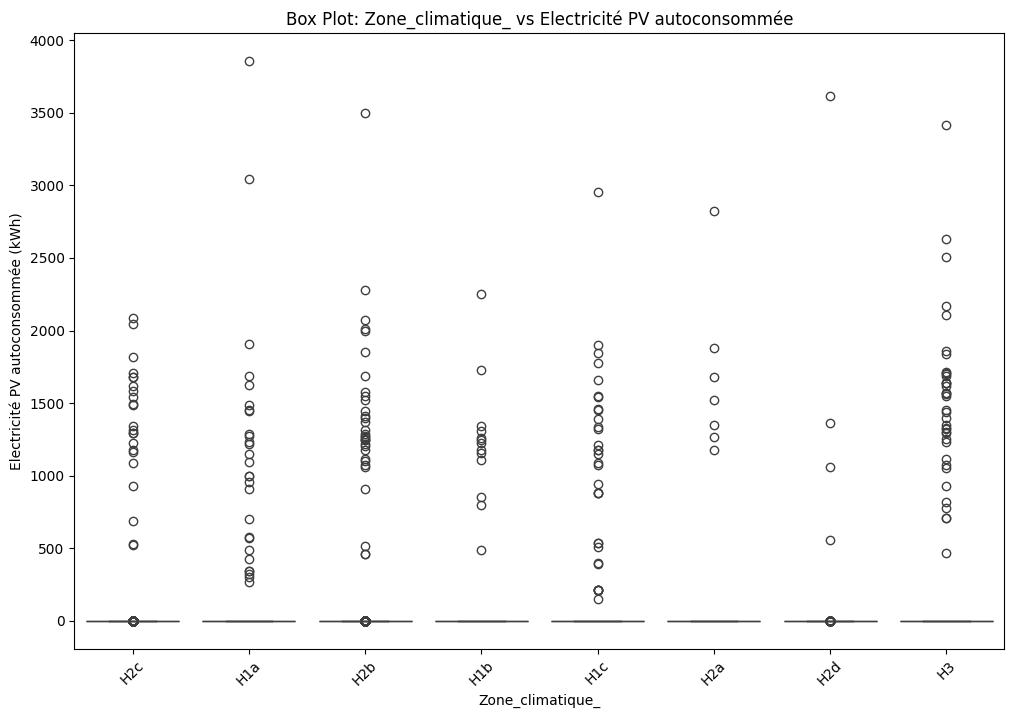

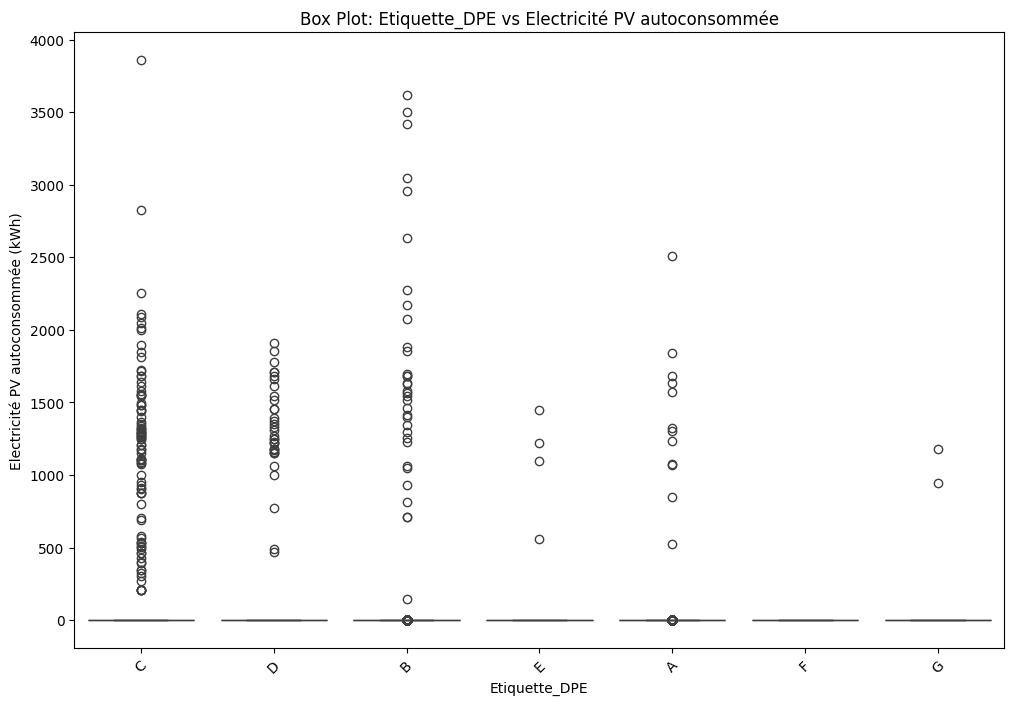

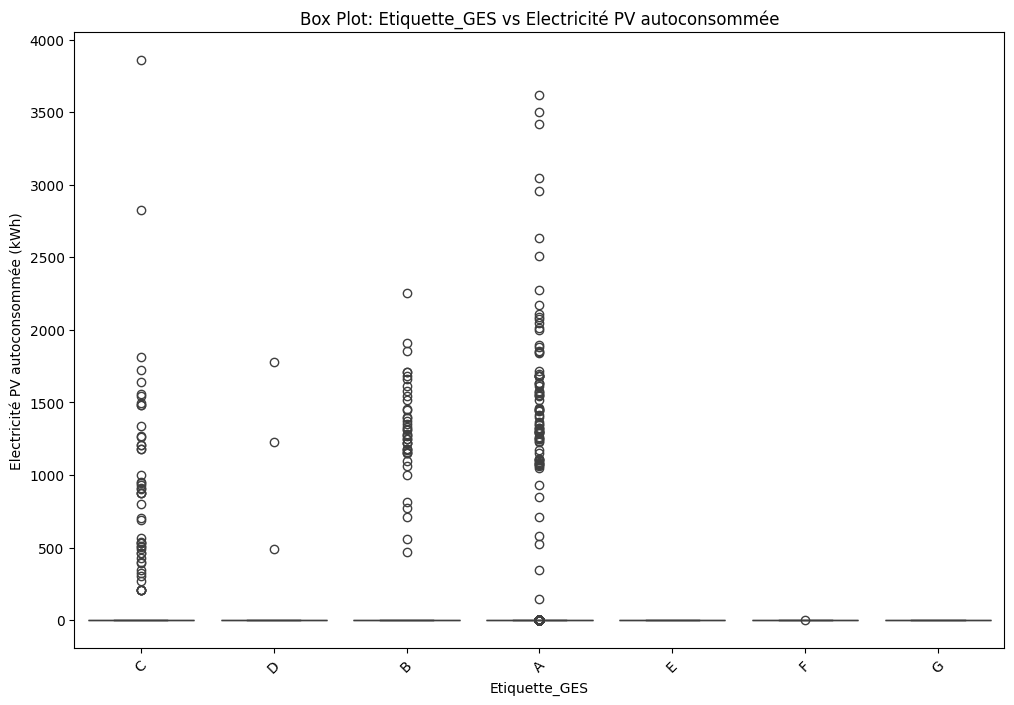

In [ ]:
# Categorical columns excluding the empty one
categorical_cols = [
    'Type_bâtiment', 'Classe_inertie_bâtiment', 'Zone_climatique_',
     'Etiquette_DPE', 'Etiquette_GES'
]

# Generate box plots for each categorical variable against the target
for col in categorical_cols:
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=data, x=col, y='Electricité_PV_autoconsommée')
    plt.title(f'Box Plot: {col} vs Electricité PV autoconsommée')
    plt.xlabel(col)
    plt.ylabel('Electricité PV autoconsommée (kWh)')
    plt.xticks(rotation=45)
    plt.show()

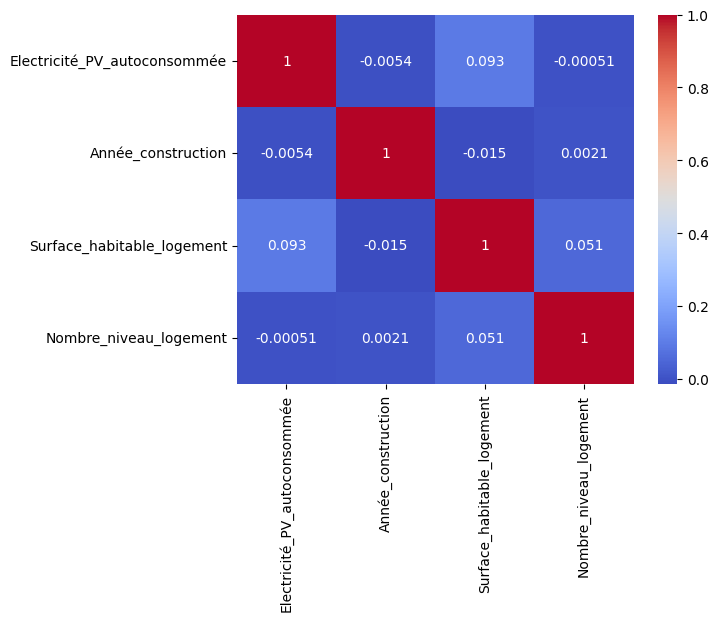

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
corr = data[['Electricité_PV_autoconsommée', 'Année_construction', 'Surface_habitable_logement', 'Nombre_niveau_logement']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()



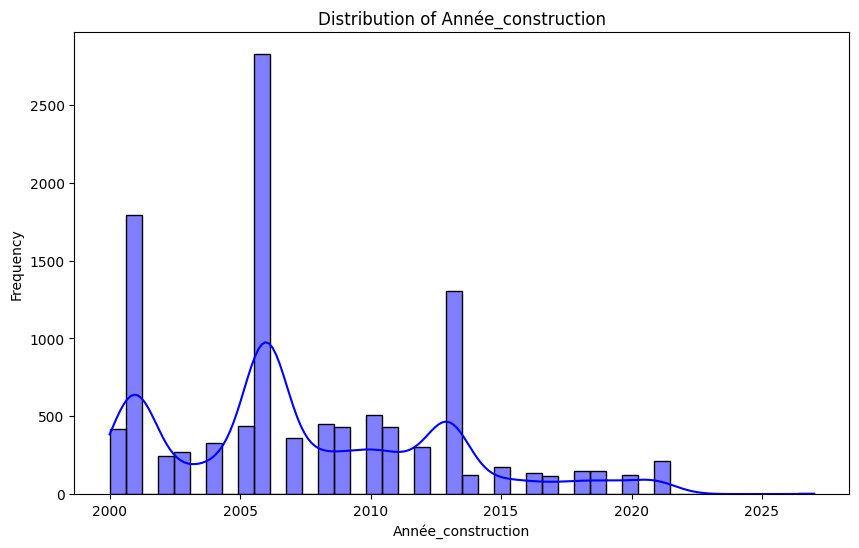

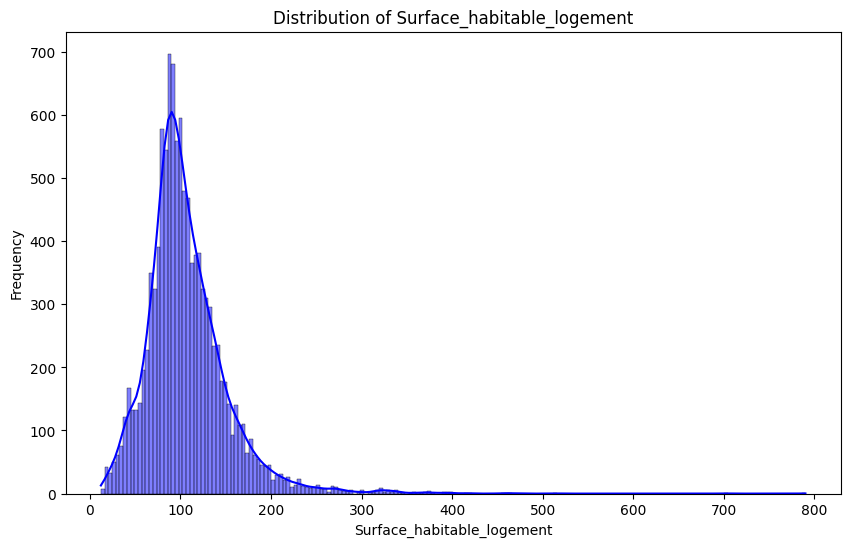

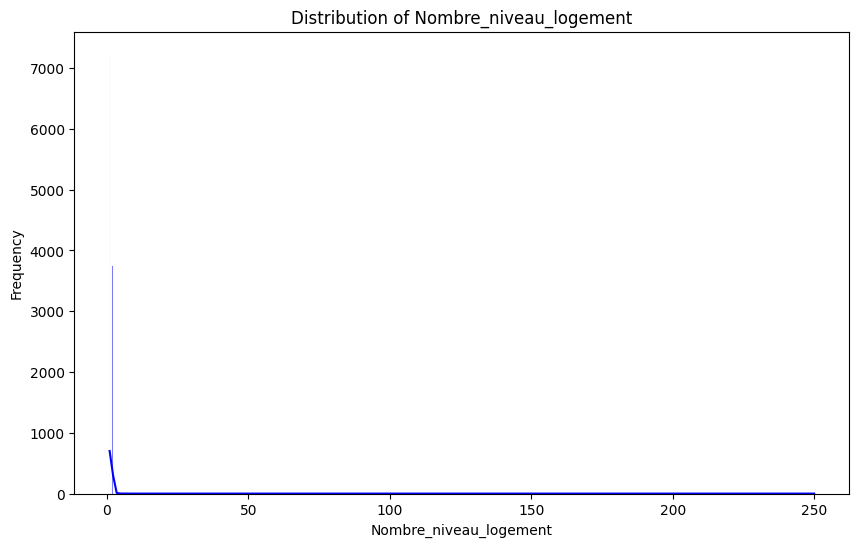

In [46]:
numerical_cols = ['Année_construction', 'Surface_habitable_logement', 'Nombre_niveau_logement']
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[col], kde=True, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()